In [1]:
import viewser
import sqlalchemy as sa
import pandas as pd
from ingester3.config import source_db_path

from views_dataviz.heatmap import plot_heatmap

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [2]:
engine = sa.create_engine(source_db_path)
country = pd.read_sql(
    "SELECT id as country_id, name FROM prod.country",
    con=engine
).set_index("country_id")
month = pd.read_sql(
    "SELECT id as month_id, year_id, month FROM prod.month",
    con=engine
).set_index("month_id")
month["date_str"] = month["year_id"].astype(str) + "-" + month["month"].astype(str)

# Fetch some example data.
df = viewser.operations.fetch("hh_fatalities_ged_acled")

# Join in countrynames and make the xlabel.
df = df.join(country)
df = df.join(month)

### Examples

If series for `x` and `y` are not provided, it will look for a multiindex and use its values (level 0 on x, level1). Save the figure by setting the `path` parameter.

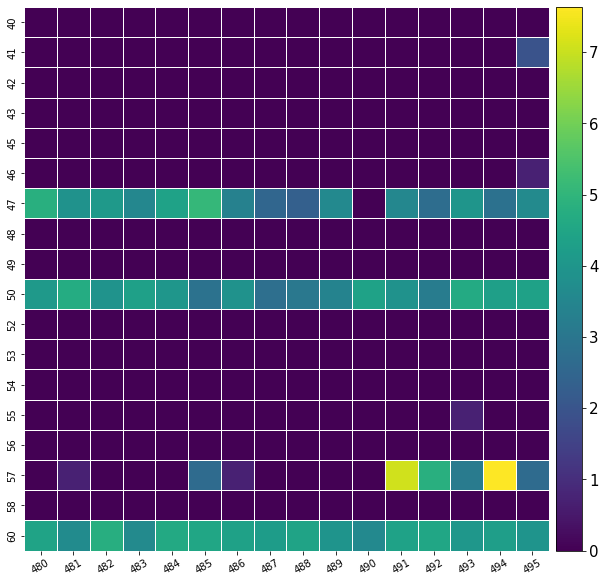

In [3]:
plot_heatmap(
    df=df.loc[480:495, 40:60, :],
    s="ln_ged_sb_dep", 
    rotation_xlabels=30
)

Usually you will of course want more informative labels. Provide those in `x` and `y`. Ensure that your dates are in datetime format so it gets sorted correctly.

In [4]:
df["date_str"] = pd.to_datetime(df["date_str"], format="%Y-%m").dt.to_period('m')

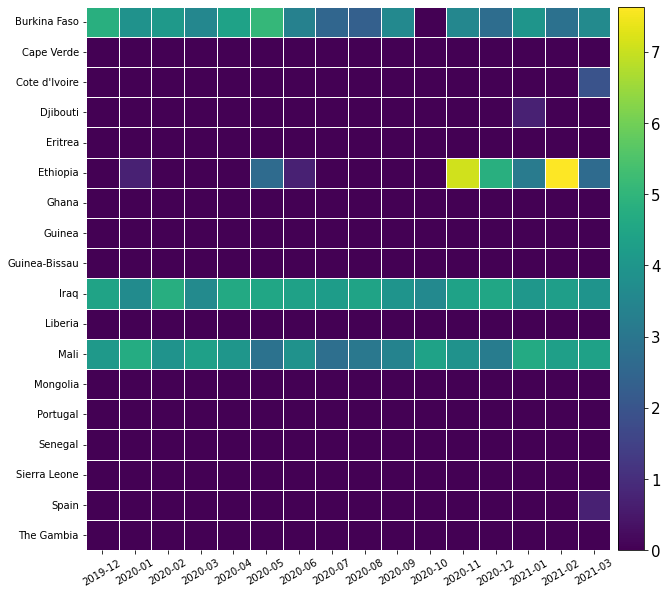

In [5]:
plot_heatmap(
    df=df.loc[480:495, 40:60, :],
    s="ln_ged_sb_dep",
    x="date_str",
    y="name",
    rotation_xlabels=30,
)

You can apply boundaries to continuous colorscales:

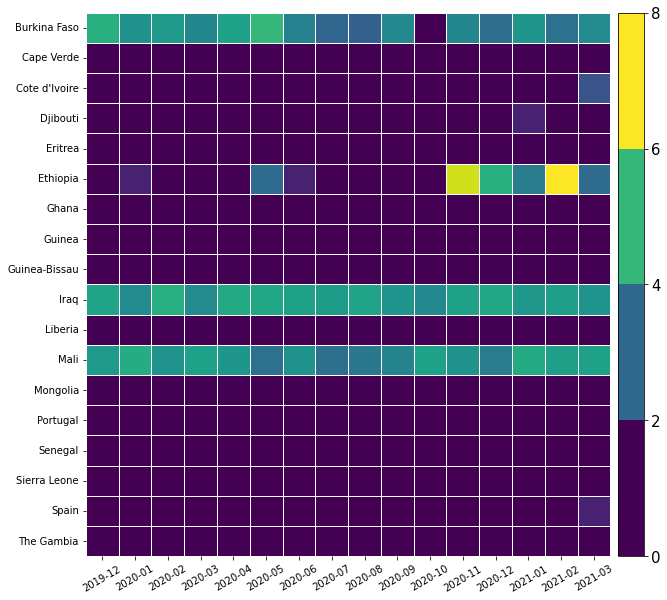

In [6]:
plot_heatmap(
    df=df.loc[480:495, 40:60, :],
    s="ln_ged_sb_dep",
    x="date_str",
    y="name",
    rotation_xlabels=30,
    boundaries=[0, 2, 4, 6, 8]
)

Categorical heatmaps are also supported. Provide colors in `colors`. Note how they override `cmap`.

In [7]:
import numpy as np
df["category"] = np.where(df["ln_ged_sb_dep"] > 2, 1, 0)

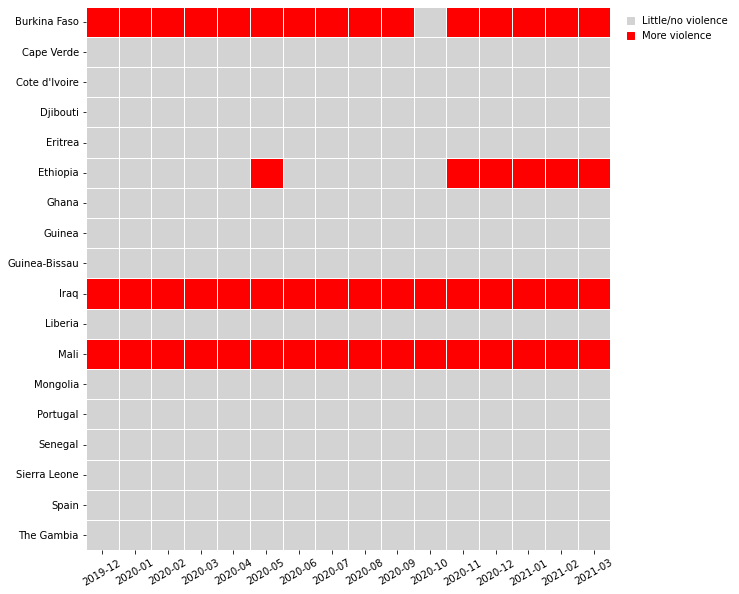

In [8]:
plot_heatmap(
    df=df.loc[480:495, 40:60, :],
    s="category",
    x="date_str",
    y="name",
    rotation_xlabels=30,
    categorical=True,
    colors=["lightgrey", "red"],
    tick_labels=["Little/no violence", "More violence"]
)